In [91]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn.cluster
import numpy as np

In [27]:
%matplotlib inline

In [6]:
countries = pd.read_csv("data/countries.csv")

In [19]:
features = {}
for i in glob.glob("data/*.csv"):
    if not i.endswith("/countries.csv"):
        feature = os.path.splitext(os.path.basename(i))[0]
        features[feature] = pd.read_csv(i).set_index("country")

In [20]:
gini = features["gini"]

(0, 53.5)

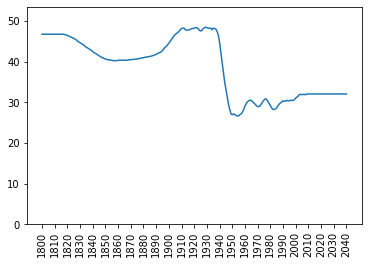

In [39]:
plt.plot(gini.columns, gini.loc["Japan", :])
plt.xticks(gini.columns[::10], rotation="vertical")
plt.ylim(0, gini.loc["Japan", :].max() + 5)

(0, 56.61871347515447)

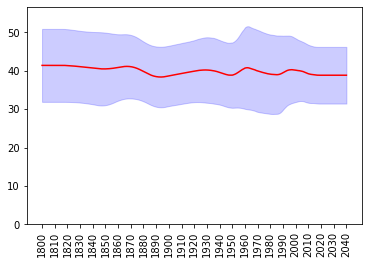

In [42]:
mean = gini.mean()
plt.plot(gini.columns, mean, '-r')
plt.xticks(gini.columns[::10], rotation="vertical")
sd = gini.std()
plt.fill_between(gini.columns, mean - sd, mean + sd, color = "blue", alpha = 0.2)
plt.ylim(0, (mean + sd).max() + 5)

(array([ 5.,  4.,  5., 10., 15., 13., 17., 21., 38., 18., 12., 14.,  5.,
         4.,  4.,  3.,  2.,  2.,  1.,  2.]),
 array([20.2, 22.5, 24.8, 27.1, 29.4, 31.7, 34. , 36.3, 38.6, 40.9, 43.2,
        45.5, 47.8, 50.1, 52.4, 54.7, 57. , 59.3, 61.6, 63.9, 66.2]),
 <a list of 20 Patch objects>)

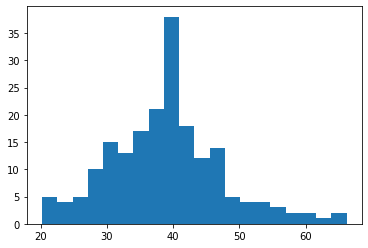

In [45]:
plt.hist(gini.loc[:, "1950"], bins = 20)

In [46]:
gini.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,...,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769
std,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,...,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433
min,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
25%,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000
50%,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000
75%,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,...,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000
max,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000


([<matplotlib.axis.XTick at 0x1215c0518>,
 <a list of 25 Text xticklabel objects>)

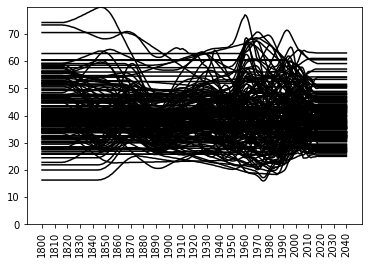

In [51]:
for row in range(gini.shape[0]):
    plt.plot(gini.columns, gini.iloc[row,], c="black")
plt.ylim(0, gini.max().max())
plt.xticks(gini.columns[::10], rotation="vertical")

(array([33.,  5.,  7.,  9.,  4.,  5., 10.,  7., 10., 13., 13., 11.,  9.,
         5.,  7., 11.,  8.,  6.,  1.,  3.,  3.,  4.,  2.,  0.,  2.,  2.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         1.]),
 array([ 0.        ,  0.40454467,  0.80908934,  1.213634  ,  1.61817867,
         2.02272334,  2.42726801,  2.83181268,  3.23635735,  3.64090201,
         4.04544668,  4.44999135,  4.85453602,  5.25908069,  5.66362535,
         6.06817002,  6.47271469,  6.87725936,  7.28180403,  7.68634869,
         8.09089336,  8.49543803,  8.8999827 ,  9.30452737,  9.70907204,
        10.1136167 , 10.51816137, 10.92270604, 11.32725071, 11.73179538,
        12.13634004, 12.54088471, 12.94542938, 13.34997405, 13.75451872,
        14.15906339, 14.56360805, 14.96815272, 15.37269739, 15.77724206,
        16.18178673]),
 <a list of 40 Patch objects>)

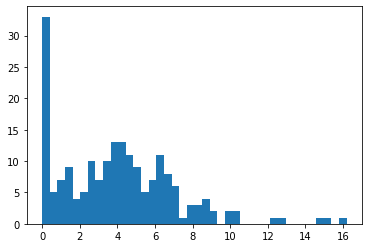

In [53]:
plt.hist(gini.std(axis=1), bins=40)

In [57]:
gini.index[gini.std(axis=1) < 0.5]

Index(['Andorra', 'Antigua and Barbuda', 'Bahrain', 'Brunei', 'Cambodia',
       'Dominica', 'Equatorial Guinea', 'Eritrea', 'Grenada', 'Holy See',
       'Kiribati', 'Kuwait', 'Libya', 'Liechtenstein', 'Malta',
       'Marshall Islands', 'Monaco', 'Mongolia', 'Nauru', 'North Korea',
       'Oman', 'Palau', 'Palestine', 'Qatar', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'South Sudan',
       'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines',
       'Tonga', 'Tuvalu', 'United Arab Emirates', 'Vanuatu'],
      dtype='object', name='country')

In [117]:
our_gini = gini.loc[gini.std(axis=1) > 1, "1900":]

In [127]:
our_gini.shape

(154, 141)

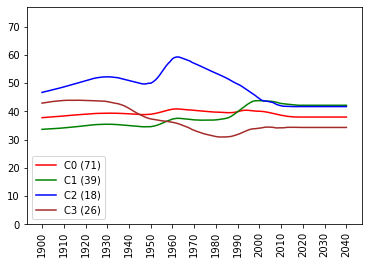

In [126]:
kmeans = sklearn.cluster.KMeans(n_clusters=4, n_init=50)
labels = kmeans.fit_predict(our_gini.subtract(our_gini.min(axis=1), axis="rows"))
colors = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'brown'
}
for cl in np.unique(labels):
    m = our_gini.iloc[labels == cl, ].mean()
    sd = our_gini.iloc[labels == cl, ].std()
    plt.plot(
        our_gini.columns, 
        m, 
        c=colors[cl], 
        label="C{} ({})".format(cl, (labels == cl).sum())
    )
#     plt.fill_between(
#         our_gini.columns,
#         m - sd,
#         m + sd,
#         color=colors[cl],
#         alpha=0.2
#     )
plt.ylim(0, our_gini.max().max())
plt.xticks(our_gini.columns[::10], rotation="vertical")
plt.legend(loc="lower left")

In [119]:
our_gini.index[labels == 1]

Index(['Algeria', 'Angola', 'Armenia', 'Central African Republic', 'Chile',
       'Estonia', 'Ethiopia', 'Gabon', 'Guinea', 'Honduras', 'Kenya', 'Mali',
       'Senegal', 'Sierra Leone', 'South Africa', 'Tunisia', 'Venezuela',
       'Zambia'],
      dtype='object', name='country')

In [120]:
labels[our_gini.index == "Japan"]

array([3], dtype=int32)